In [9]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math


In [40]:
ann_path = r"D:\Work\codev2\data\final_data"
save= r"D:\Work\codev2\data\ann_defect"
for folder_ in os.listdir(ann_path):
    path_an = os.path.join(ann_path, folder_)

    if not os.path.isdir(path_an):
        continue
    if os.path.isdir(path_an):
        path = os.path.join(path_an, folder_)
        # print(path)
        for folder__ in os.listdir(path):
            path = os.path.join(path_an, folder_, folder__)
            # print(path)
            os.makedirs(os.path.join(save, folder_ + "/" + folder__), exist_ok=True)
    ###################################################################################
    #################################################################################
            # for folder in os.listdir(path):
            #     print(folder)
            #     os.makedirs(os.path.join(save, folder_ + "/" + folder__+ "/" + folder), exist_ok=True)
            #     path = os.path.join(path_an, folder_, folder__, folder) 
            #     print(path)
                
                #########################################################################################
                #########################################################################################
            for file in os.listdir(path):
                # print(os.path.join(path_an, folder, file))
                if file.endswith(".json"):
                    continue
                if file.endswith(".bmp"):
                    continue
                if file.endswith(".csv"):
                    # save_path = save + folder
                    # os.makedirs(save_path, exist_ok=True)
                    path_csv = os.path.join(path_an, folder_, folder__) + "/" + file
                    path_img = os.path.join(path_an, folder_, folder__) + "/" + file[-7:-4]+".bmp"
                    img = cv2.imread(path_img)
                    csv_data = pd.read_csv(path_csv)
                    for index, row in csv_data.iterrows():
                        
                        bbox1 = np.float32([[row['Top_Left_X'],row['Top_Left_Y']], [row['Bottom_Right_X'],row['Bottom_Right_Y']], [row['Top_Right_X'],row['Top_Right_Y']], [row['Bottom_Left_X'], row['Bottom_Left_Y']]])
                        
                        width, height = math.sqrt((row['Top_Left_X']-row['Top_Right_X'])**2+(row['Top_Left_Y']-row['Top_Right_Y'])**2),\
                            math.sqrt((row['Top_Left_X']-row['Bottom_Left_X'])**2+(row['Top_Left_Y']-row['Bottom_Left_Y'])**2)
                        # print(width, height)
                        width, height = int(width), int(height)
                        bbox2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

                        M = cv2.getPerspectiveTransform(bbox1, bbox2)

                        dst = cv2.warpPerspective(img, M, (width, height))

                        # plt.imshow(dst)
                        plt.imsave(os.path.join(os.path.join(save, folder_ + "/" + folder__+ "/" ), path_img[-7:-4] + "_" +str(index)+".bmp"), dst)
                        # plt.show()
                        # break


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Work\\codev2\\data\\ann_defect\\final_27.09\\Z10 S-UW\\UW\\_0.bmp'

In [18]:

path_an  = r"D:\Work\codev2\code\work_code\model_2\final_19.9v1"
save= r"D:\Work\codev2\code\work_code\model_2\output/"
for folder in os.listdir(path_an):
    for file in os.listdir(os.path.join(path_an, folder)):
        # print(os.path.join(path_an, folder, file))
        if file.endswith(".csv"):
            save_path = save + folder
            os.makedirs(save_path, exist_ok=True)
            path_csv = os.path.join(path_an, folder) + "/" + file
            path_img = os.path.join(path_an, folder) + "/" + file[-7:-4]+".bmp"
            img = cv2.imread(path_img)
            csv_data = pd.read_csv(path_csv)
            for index, row in csv_data.iterrows():
                
                bbox1 = np.float32([[row['Top_Left_X'],row['Top_Left_Y']], [row['Bottom_Right_X'],row['Bottom_Right_Y']], [row['Top_Right_X'],row['Top_Right_Y']], [row['Bottom_Left_X'], row['Bottom_Left_Y']]])
                
                width, height = math.sqrt((row['Top_Left_X']-row['Top_Right_X'])**2+(row['Top_Left_Y']-row['Top_Right_Y'])**2),\
                    math.sqrt((row['Top_Left_X']-row['Bottom_Left_X'])**2+(row['Top_Left_Y']-row['Bottom_Left_Y'])**2)
                # print(width, height)
                width, height = int(width), int(height)
                bbox2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

                M = cv2.getPerspectiveTransform(bbox1, bbox2)

                dst = cv2.warpPerspective(img, M, (width, height))

                # plt.imshow(dst)
                plt.imsave(os.path.join(save_path, path_img[-7:-4] + "_" +str(index)+".bmp"), dst)
                # plt.show()
                # break

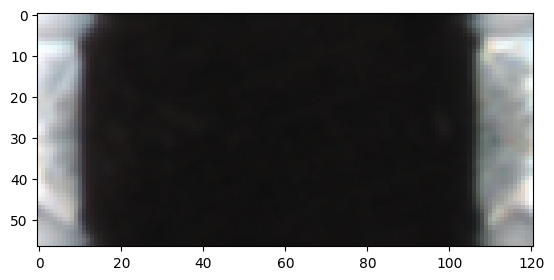

In [13]:
save_path = r"D:\Work\codev2\code\work_code\model_2\output"
path_csv = r"D:\Work\codev2\code\work_code\model_2\final_19.9v1\C05 VS-W\053.csv"

csv_data = pd.read_csv(path_csv)
for index, row in csv_data.iterrows():
    path = r"D:\Work\codev2\code\work_code\model_2\final_19.9v1\C05 VS-W\053.bmp"
    img = cv2.imread(path)
    bbox1 = np.float32([[row['Top_Left_X'],row['Top_Left_Y']], [row['Bottom_Right_X'],row['Bottom_Right_Y']], [row['Top_Right_X'],row['Top_Right_Y']], [row['Bottom_Left_X'], row['Bottom_Left_Y']]])
    
    width, height = math.sqrt((row['Top_Left_X']-row['Top_Right_X'])**2+(row['Top_Left_Y']-row['Top_Right_Y'])**2),\
        math.sqrt((row['Top_Left_X']-row['Bottom_Left_X'])**2+(row['Top_Left_Y']-row['Bottom_Left_Y'])**2)
    # print(width, height)
    width, height = int(width), int(height)
    bbox2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

    M = cv2.getPerspectiveTransform(bbox1, bbox2)

    dst = cv2.warpPerspective(img, M, (width, height))

    plt.imshow(dst)
    plt.imsave(os.path.join(save_path, path[-7:-4] + "_" +str(index)+".bmp"), dst)
    plt.show()
    break

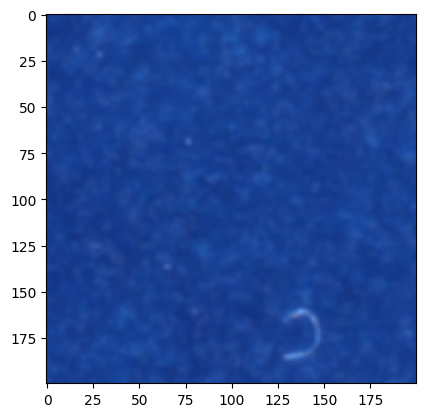